# ★ Partial Differential Equations ★

In [142]:
# Import modules
import numpy as np
import scipy
import sympy as sym
from scipy import sparse
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import Math
from IPython.display import display

sym.init_printing(use_latex=True)

# 8.1 Parabolic Equations

## Forward Difference Method

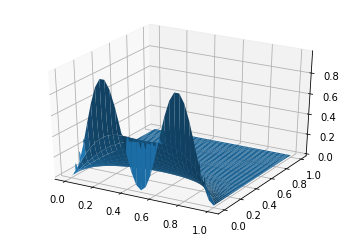

In [170]:
def heatfd(xl, xr, yb, yt, M, N):
    f = lambda x : np.power(np.sin(2 * np.pi * x), 2)
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    D = 1
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    sigma = D * k / np.power(h, 2)
    A = np.diag(1 - 2 * sigma * np.ones(m)) + \
        np.diag(sigma * np.ones(m - 1), 1) + \
        np.diag(sigma * np.ones(m - 1), -1) 
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
#     expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
    

    for j in range(n - 1):
        ww = np.zeros(m)
        ww[0] = lside[j]
        ww[-1] = rside[j]
        v = np.matmul(A, w[j]) + sigma * ww
        w[j + 1,:] = v
        
    
    w = np.column_stack([lside, w, rside])
    x = np.arange(0, m+2) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, T, w)
    plt.show()
    plt.clf()

        
heatfd(0, 1, 0, 1, 30, 2000)

## Backward Difference Method

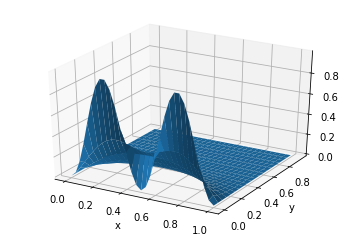

In [168]:
def heatbd(xl, xr, yb, yt, M, N):
    f = lambda x : np.sin(2 * np.pi * x) ** 2
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    D = 1 # diffusion coefficient
    sigma = D * k / (h ** 2)
    
    A = np.diag(1 + 2 * sigma * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    ''' Initial conditions ''' 
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
#     expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
        
    for j in range(n - 1):
        ww = np.zeros(m)
        ww[0] = lside[j]
        ww[-1] = rside[j]
        v = np.matmul(np.linalg.inv(A), w[j,:] + sigma * ww)
        w[j + 1,:] = v
        
    w = np.column_stack([lside, w, rside])
    x = np.arange(0, m+2) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, T, w)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()
    
heatbd(0, 1, 0, 1, 30, 20)

### Example 

Apply the Backward Difference Method to solve the heat equation

$$
\left\{\begin{matrix}\begin{align*}
& u_t = 4u_{xx}\: & for\:all\:0 \leq x \leq 1\:,0 \leq t \leq 1 \\
& u(x,0) = e^{-x/2}\: & for\:all\:0 \leq x \leq 1 \\
& u(0,t) = e^t\: & for\:all\:0 \leq t \leq 1 \\
& u(1,t) = e^{t-1/2}\: & for\:all\:0 \leq t \leq 1 
\end{align*}\end{matrix}\right.
$$


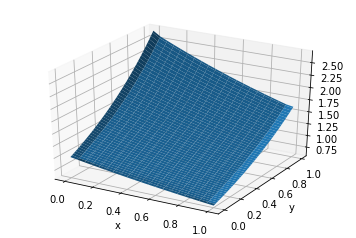

In [134]:
def heatbd(xl, xr, yb, yt, M, N):
    l = lambda t : np.exp(t)
    r = lambda t : np.exp(t - 0.5)
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    D = 4 # diffusion coefficient
    sigma = D * k / (h ** 2)
    
    A = np.diag((1 + 2 * sigma) * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    ''' Initial conditions ''' 
    x = sym.Symbol('x')
    expr = sym.exp(-x / 2)
#     expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
        
    for j in range(n - 1):
        ww = np.zeros(m)
        ww[0] = lside[j]
        ww[-1] = rside[j]
        v = np.matmul(np.linalg.inv(A), w[j,:] + sigma * ww)
        w[j + 1,:] = v
        
    w = np.column_stack([lside, w, rside])
    x = np.arange(0, m+2) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 0
    ax.plot_surface(X[stride:], T[stride:], w[stride:])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()
    
heatbd(0, 1, 0, 1, 20, 100)

### Example

Apply the Backward Difference Method to solve the heat equation with homogeneous Neumann boundary conditions

$$
\left\{\begin{matrix}\begin{align*}
& u_t = u_{xx}\: & for\:all\:0 \leq x \leq 1\:,0 \leq t \leq 1 \\
& u(x,0) = \sin^2{2\pi x}\: & for\:all\:0 \leq x \leq 1 \\
& u(0,t) = 0\: & for\:all\:0 \leq t \leq 1 \\
& u(1,t) = 0\: & for\:all\:0 \leq t \leq 1 
\end{align*}\end{matrix}\right.
$$


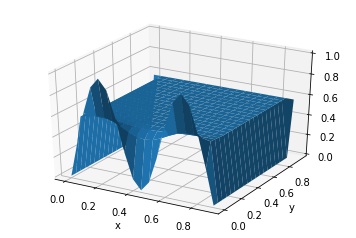

In [178]:
def heatbdn(xl, xr, yb, yt, M, N):
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    D = 1 # diffusion coefficient
    sigma = D * k / (h ** 2)
    
    A = np.diag((1 + 2 * sigma) * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
    
    A[0,:3] = np.array([-3, 4, -1])
    A[-1,-3:] = np.array([-1, 4, -3])
    
    
    ''' Initial conditions ''' 
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
#     expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
        
    for j in range(n - 1):
        b = w[j,:]
        b[0] = 0
        b[-1] = 0
        w[j + 1,:] = np.matmul(np.linalg.inv(A), b)
        
    x = np.arange(0, m) * h
    t = np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 0
    ax.plot_surface(X[stride:], T[stride:], w[stride:])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()
    
heatbdn(0, 1, 0, 1, 20, 20)

## Crank-Nicolson Method

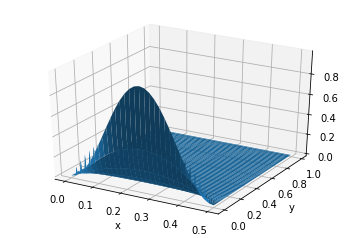

In [193]:
def crank_nicolson_heat(xl, xr, yb, yt, M, N):
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    D = 1
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    sigma = D * k / (h ** 2)
    
    A = np.diag((2 + 2 * sigma) * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
        
    B = np.diag((2 - 2 * sigma) * np.ones(m)) + \
        np.diag(sigma * np.ones(m - 1), 1) + \
        np.diag(sigma * np.ones(m - 1), -1)
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    ''' Initial conditions ''' 
    x = sym.Symbol('x')
    expr = sym.sin(2 * sym.pi * x) ** 2
#     expr = sym.diff(expr, x)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = expr.subs(x, xl + (i + 1) * h).evalf()
        
    for j in range(n - 1):
        s = np.zeros(m)
        s[0] = lside[j] + lside[j+1]
        s[-1] = rside[j] + rside[j+1]
        w[j + 1,:] = np.matmul(np.linalg.inv(A), np.matmul(B, w[j,:]) + sigma * s)
        
    w = np.column_stack([lside, w, rside])
    x = xl +np.arange(0, m+2) * h
    t = yb + np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 0
    ax.plot_surface(X[stride:], T[stride:], w[stride:])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()
    
crank_nicolson_heat(0, 0.5, 0, 1, 30, 100)

### Example

Apply the Crank-Nicolson Method to the heat equation

$$
\left\{\begin{matrix}\begin{align*}
& u_t = Du_{xx} + Cu \\
& u(x,0) = \sin^2{(\frac{\pi}{L} x)}\: &for\:all\:0 \leq x \leq L \\
& u(0,t) = 0\: &for\:all\:t \geq 0 \\
& u(L,t) = 0\: &for\:all\:t \geq 0
\end{align*}\end{matrix}\right.
$$

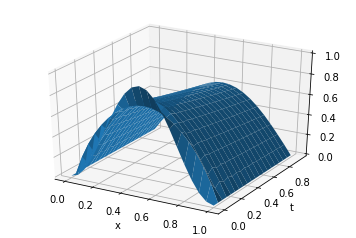

In [42]:
def crank_nicolson_growth(xl, xr, yb, yt, M, N):
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    D = 1
    L = 1
    C = 9.5
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    sigma = D * k / h ** 2
    
    A = np.diag((2 - k * C + 2 * sigma) * np.ones(m)) + \
        np.diag(-sigma * np.ones(m - 1), 1) + \
        np.diag(-sigma * np.ones(m - 1), -1) 
        
    B = np.diag((2 + k * C - 2 * sigma) * np.ones(m)) + \
        np.diag(sigma * np.ones(m - 1), 1) + \
        np.diag(sigma * np.ones(m - 1), -1)
        
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    ''' Initial conditions ''' 
    f = lambda x : np.power(np.sin(np.pi * x / L), 2)
    
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    for i in range(m):
        w[0, i] = f(xl + (i + 1) * h)
        
    for j in range(n - 1):
        s = np.zeros(m)
        s[0] = lside[j] + lside[j+1]
        s[-1] = rside[j] + rside[j+1]
        w[j + 1,:] = np.matmul(np.linalg.inv(A), np.matmul(B, w[j,:]) + sigma * s)
        
    w = np.column_stack([lside, w, rside])
    x = xl + np.arange(0, m+2) * h
    t = yb + np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 0
    ax.plot_surface(X[stride:], T[stride:], w[stride:])
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    plt.clf()
    
crank_nicolson_growth(0, 1, 0, 1, 20, 20)

# 8.2 Hyperbolic Equations

### Example

Apply the explicit Finite Difference Method to the wave equation with wave speed $c = 2$ and initial conditions $f(x) = \sin{\pi x}$ and $g(x) = l(x) = r(x) = 0$

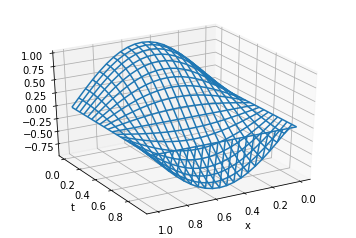

In [26]:
def wavefd(xl, xr, yb, yt, M, N):
    c = 1
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    
    sigma = c * k / h
    
    f = lambda x : np.sin(x * np.pi)
    l = lambda x : 0 * x
    r = lambda x : 0 * x
    g = lambda x : 0 * x
    
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    A = np.diag((2 - 2 * sigma ** 2) * np.ones(m)) + \
        np.diag((sigma ** 2) * np.ones(m - 1), 1) + \
        np.diag((sigma ** 2) * np.ones(m - 1), -1)
        
    '''Initial condition'''
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    xv = np.linspace(0, 1, M + 1)[1:-1]
    w[0, :] = f(xv)
    w[1, :] = 0.5 * np.matmul(A, w[0, :]) + \
              k * g(xv) + \
              0.5 * np.power(sigma, 2) * np.array([lside[0], *np.zeros(m - 2), rside[0]])
            
    for i in range(2, n - 1):
        w[i,:] = np.matmul(A, w[i-1,:]) - w[i-2,:] + np.power(sigma, 2) * \
                 np.array([lside[i-1], *np.zeros(m - 2), rside[i-1]])
            
    
    w = np.column_stack([lside, w, rside])
    x = xl + np.arange(0, m + 2) * h
    t = yb + np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 0
    ax.plot_wireframe(X[stride:], T[stride:], w[stride:])
#     ax.plot_surface(X[stride:], T[stride:], w[stride:])
    ax.view_init(azim=60, elev=30)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    plt.clf()
    
    
wavefd(0, 1, 0, 1, 20, 20)

## The CFL condition

The finite Difference Method is applied to the wave equation with wave speed $c > 0$ is stable if $\sigma = \frac{ck}{h} \leq 1$

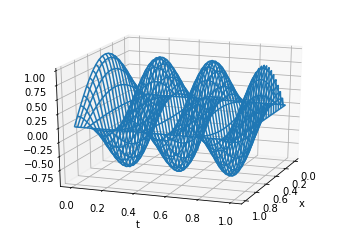

In [22]:
def wavefd_cfl(xl, xr, yb, yt, M, N, C = 1):
    c = C
    h = (xr - xl) / M
    k = (yt - yb) / N
    
    if c * k > h:
        raise ValueError("CFL condition 'c * k <= h' is not satisfied, c * k is %f and h is %f" %(c * k, h) )
    
    m = M - 1
    n = N
    
    sigma = c * k / h
    
    f = lambda x : np.sin(x * np.pi)
    l = lambda x : 0 * x
    r = lambda x : 0 * x
    g = lambda x : 0 * x
    
    lside = l(yb + np.arange(n) * k)
    rside = r(yb + np.arange(n) * k)
    
    A = np.diag((2 - 2 * sigma ** 2) * np.ones(m)) + \
        np.diag((sigma ** 2) * np.ones(m - 1), 1) + \
        np.diag((sigma ** 2) * np.ones(m - 1), -1)
        
    '''Initial condition'''
    w = np.zeros(n * m).reshape(n, m).astype(np.float128)
    xv = np.linspace(0, 1, M + 1)[1:-1]
    w[0, :] = f(xv)
    w[1, :] = 0.5 * np.matmul(A, w[0, :]) + \
              k * g(xv) + \
              0.5 * np.power(sigma, 2) * np.array([lside[0], *np.zeros(m - 2), rside[0]])
            
    for i in range(2, n - 1):
        w[i,:] = np.matmul(A, w[i-1,:]) - w[i-2,:] + np.power(sigma, 2) * \
                 np.array([lside[i-1], *np.zeros(m - 2), rside[i-1]])
            
    
    w = np.column_stack([lside, w, rside])
    x = xl + np.arange(0, m + 2) * h
    t = yb + np.arange(0, n) * k
        
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    stride = 0
    ax.plot_wireframe(X[stride:], T[stride:], w[stride:])
#     ax.plot_surface(X[stride:], T[stride:], w[stride:])
    ax.view_init(azim=20, elev=20)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    plt.clf()
    
    
wavefd_cfl(0, 1, 0, 1, 20, 200, 6)

# 8.3 Elliptic Equations

### Example

Apply the Finite Difference Method with m = n = 5 to approximate the solution of  the Laplace equation $\Delta{u} = 0$ on $[0,1] \times [1,2]$ with the following Dirichlet boundary conditions :

$$
\begin{matrix}\begin{align*}
u(x,1) &= \ln{(x^2 + 1)} \\
u(x,2) &= \ln{(x^2 + 4)} \\
u(0,y) &= 2\ln{y} \\ 
u(1,y) &= \ln{(y^2 + 1)}
\end{align*}\end{matrix}
$$

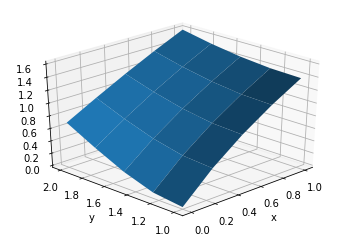

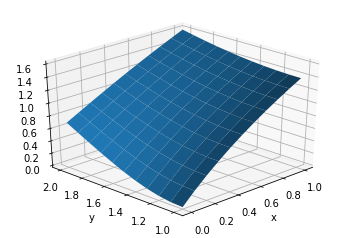

In [522]:
def poisson(xl, xr, yb, yt, M, N):
    f = lambda x, y : 0
    g1 = lambda x : np.log(pow(x, 2) + 1)
    g2 = lambda x : np.log(pow(x, 2) + 4)
    g3 = lambda y : 2 * np.log(y)
    g4 = lambda y : np.log(pow(y, 2) + 1)
    
    m, n = M + 1, N + 1
    mn = m * n
    h, k = (xr - xl) / M, (yt - yb) / N
    h2, k2 = pow(h, 2), pow(k, 2)
    x = xl + np.arange(M + 1) * h
    y = yb + np.arange(N + 1) * k
    A = np.zeros((mn, mn))
    b = np.zeros((mn, 1))
    
    ''' interior points '''
    for i in range(2, m):
        for j in range(2, n):
            A[i+(j-1)*m - 1][i-1+(j-1)*m - 1] = 1 / h2
            A[i+(j-1)*m - 1][i+1+(j-1)*m - 1] = 1 / h2
            A[i+(j-1)*m - 1][i+(j-1)*m - 1] = - 2 / h2 - 2 / k2
            A[i+(j-1)*m - 1][i+(j-2)*m - 1] = 1 / k2
            A[i+(j-1)*m - 1][i+j*m - 1] = 1 / k2
            b[i+(j-1)*m - 1] = f(x[i], y[j])
            
    ''' bottom and top boundary points '''
    for i in range(1, m + 1):
        j = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g1(x[i - 1])
        j = n
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g2(x[i - 1])
        
    ''' left and right boundary points '''
    for j in range(2, n):
        i = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g3(y[j - 1])
        i = m
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g4(y[j - 1])
        
    
    v = np.matmul(np.linalg.inv(A), b)
    w = v.reshape(n, m).T
                    
    X, Y = np.meshgrid(x, y)
        
    fig = plt.figure()
    ax =fig.gca(projection='3d')
    ax.view_init(azim=225)
    ax.plot_surface(X, Y, w)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show(fig)
    plt.close()
    
    
    
poisson(0, 1, 1, 2, 4, 4)
poisson(0, 1, 1, 2, 10, 10)

### Example

Find the electrostatic potential on the square $[0,1] \times [0,1]$, assuming no charge in the interior and assuming the following boundary conditions:

$$
\begin{matrix}\begin{align*}
u(x,0) &= \sin{\pi x} \\
u(x,1) &= \sin{\pi x} \\
u(0,y) &= 0 \\ 
u(1,y) &= 0
\end{align*}\end{matrix}
$$

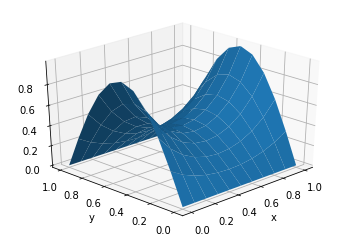

In [527]:
def poisson(xl, xr, yb, yt, M, N):
    f = lambda x, y : 0
    g1 = lambda x : np.sin(x * np.pi)
    g2 = lambda x : np.sin(x * np.pi)
    g3 = lambda y : 0
    g4 = lambda y : 0
    
    m, n = M + 1, N + 1
    mn = m * n
    h, k = (xr - xl) / M, (yt - yb) / N
    h2, k2 = pow(h, 2), pow(k, 2)
    x = xl + np.arange(M + 1) * h
    y = yb + np.arange(N + 1) * k
    A = np.zeros((mn, mn))
    b = np.zeros((mn, 1))
    
    ''' interior points '''
    for i in range(2, m):
        for j in range(2, n):
            A[i+(j-1)*m - 1][i-1+(j-1)*m - 1] = 1 / h2
            A[i+(j-1)*m - 1][i+1+(j-1)*m - 1] = 1 / h2
            A[i+(j-1)*m - 1][i+(j-1)*m - 1] = - 2 / h2 - 2 / k2
            A[i+(j-1)*m - 1][i+(j-2)*m - 1] = 1 / k2
            A[i+(j-1)*m - 1][i+j*m - 1] = 1 / k2
            b[i+(j-1)*m - 1] = f(x[i], y[j])
            
    ''' bottom and top boundary points '''
    for i in range(1, m + 1):
        j = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g1(x[i - 1])
        j = n
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g2(x[i - 1])
        
    ''' left and right boundary points '''
    for j in range(2, n):
        i = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g3(y[j - 1])
        i = m
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g4(y[j - 1])
        
    
    v = np.matmul(np.linalg.inv(A), b)
    w = v.reshape(n, m).T
                    
    X, Y = np.meshgrid(x, y)
        
    fig = plt.figure()
    ax =fig.gca(projection='3d')
    ax.view_init(azim=225)
    ax.plot_surface(X, Y, w)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show(fig)
    plt.close()
    
poisson(0, 1, 0, 1, 10, 10)

## Finite Element Method for elliptic equations

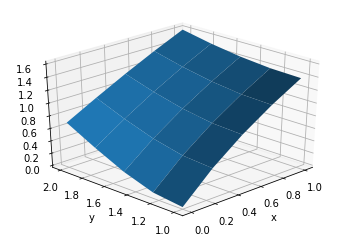

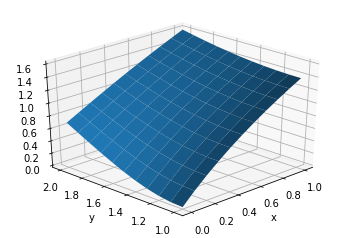

In [14]:
def poissonfem(xl, xr, yb, yt, M, N):
    f = lambda x, y : 0
    r = lambda x, y : 0
    g1 = lambda x : np.log(pow(x, 2) + 1)
    g2 = lambda x : np.log(pow(x, 2) + 4)
    g3 = lambda y : 2 * np.log(y)
    g4 = lambda y : np.log(pow(y, 2) + 1)
    
    m, n = M + 1, N + 1
    mn = m * n
    h, k = (xr - xl) / M, (yt - yb) / N
    hk = h * k
    h2, k2 = pow(h, 2), pow(k, 2)
    x = xl + np.arange(M + 1) * h
    y = yb + np.arange(N + 1) * k
    A = np.zeros((mn, mn))
    b = np.zeros((mn, 1))
    
    B1 = lambda i, j : (x[i] - 2 * h / 3, y[j] - k / 3)
    B2 = lambda i, j : (x[i] - h / 3, y[j] - 2 * k / 3)
    B3 = lambda i, j : (x[i] + h / 3, y[j] - k / 3)
    B4 = lambda i, j : (x[i] + 2 * h / 3, y[j] + k / 3)
    B5 = lambda i, j : (x[i] + h / 3, y[j] + 2 * k / 3)
    B6 = lambda i, j : (x[i] - h / 3, y[j] + k / 3)
    
    
    ''' interior points '''
    for i in range(2, m):
        for j in range(2, n):
            rsum = r(*B1(i,j)) + r(*B2(i,j)) + r(*B3(i,j)) + r(*B4(i,j)) + r(*B5(i,j)) + r(*B6(i,j))
            fsum = f(*B1(i,j)) + f(*B2(i,j)) + f(*B3(i,j)) + f(*B4(i,j)) + f(*B5(i,j)) + f(*B6(i,j))
            A[i+(j-1)*m - 1][i+(j-1)*m - 1] = 2 * (h2 + k2) / hk - hk * rsum / 18
            A[i+(j-1)*m - 1][i-1+(j-1)*m - 1] = -k/h - hk * (r(*B1(i,j)) + r(*B6(i,j))) / 18
            A[i+(j-1)*m - 1][i-1+(j-2)*m - 1] = -hk * (r(*B1(i,j)) + r(*B2(i,j))) / 18
            A[i+(j-1)*m - 1][i+(j-2)*m - 1] = -h/k - hk * (r(*B2(i,j)) + r(*B3(i,j))) / 18
            A[i+(j-1)*m - 1][i+1+(j-1)*m - 1] = -k/h - hk * (r(*B3(i,j)) + r(*B4(i,j))) / 18
            A[i+(j-1)*m - 1][i+1+j*m - 1] = -hk * (r(*B4(i,j)) + r(*B5(i,j))) / 18
            A[i+(j-1)*m - 1][i+j*m - 1] = - h / k - hk * (r(*B5(i,j)) + r(*B6(i,j))) / 18
            b[i+(j-1)*m - 1] = - h * k * fsum / 6
            
            
    ''' bottom and top boundary points '''
    for i in range(1, m + 1):
        j = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g1(x[i - 1])
        j = n
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g2(x[i - 1])
        
    ''' left and right boundary points '''
    for j in range(2, n):
        i = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g3(y[j - 1])
        i = m
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g4(y[j - 1])
        
    
    v = np.matmul(np.linalg.inv(A), b)
    w = v.reshape(n, m).T
                    
    X, Y = np.meshgrid(x, y)
        
    fig = plt.figure()
    ax =fig.gca(projection='3d')
    ax.view_init(azim=225)
    ax.plot_surface(X, Y, w)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show(fig)
    plt.close()
    
    
    
poissonfem(0, 1, 1, 2, 4, 4)
poissonfem(0, 1, 1, 2, 10, 10)

### Example

Apply the Finite Element Method with M = N = 16 to approximate the solution of the elliptic Dirichlet problem

$$
\left\{\begin{matrix}\begin{align*}
 & \Delta{u} + 4\pi^2u = 2 \sin{2\pi y} \\ 
 & u(x,0) = 0\text{ for } 0 \le x \le 1 \\
 & u(x,1) = 0\text{ for } 0 \le x \le 1 \\
 & u(0,y) = 0\text{ for } 0 \le y \le 1 \\
 & u(1,y) = \sin{2\pi y}\text{ for } 0 \le y \le 1
\end{align*}\end{matrix}\right.
$$

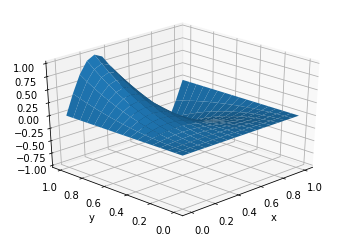

In [2]:
def poissonfem(xl, xr, yb, yt, M, N):
    f = lambda x, y : 2 * np.sin(2 * np.pi * y)
    r = lambda x, y : 4 * pow(np.pi, 2)
    g1 = lambda x : 0
    g2 = lambda x : 0
    g3 = lambda y : 0
    g4 = lambda y : np.sin(2 * np.pi * y)
    
    m, n = M + 1, N + 1
    mn = m * n
    h, k = (xr - xl) / M, (yt - yb) / N
    hk = h * k
    h2, k2 = pow(h, 2), pow(k, 2)
    x = xl + np.arange(M + 1) * h
    y = yb + np.arange(N + 1) * k
    A = np.zeros((mn, mn))
    b = np.zeros((mn, 1))
    
    B1 = lambda i, j : (x[i] - 2 * h / 3, y[j] - k / 3)
    B2 = lambda i, j : (x[i] - h / 3, y[j] - 2 * k / 3)
    B3 = lambda i, j : (x[i] + h / 3, y[j] - k / 3)
    B4 = lambda i, j : (x[i] + 2 * h / 3, y[j] + k / 3)
    B5 = lambda i, j : (x[i] + h / 3, y[j] + 2 * k / 3)
    B6 = lambda i, j : (x[i] - h / 3, y[j] + k / 3)
    
    
    ''' interior points '''
    for i in range(2, m):
        for j in range(2, n):
            rsum = r(*B1(i,j)) + r(*B2(i,j)) + r(*B3(i,j)) + r(*B4(i,j)) + r(*B5(i,j)) + r(*B6(i,j))
            fsum = f(*B1(i,j)) + f(*B2(i,j)) + f(*B3(i,j)) + f(*B4(i,j)) + f(*B5(i,j)) + f(*B6(i,j))
            A[i+(j-1)*m - 1][i+(j-1)*m - 1] = 2 * (h2 + k2) / hk - hk * rsum / 18
            A[i+(j-1)*m - 1][i-1+(j-1)*m - 1] = -k/h - hk * (r(*B1(i,j)) + r(*B6(i,j))) / 18
            A[i+(j-1)*m - 1][i-1+(j-2)*m - 1] = -hk * (r(*B1(i,j)) + r(*B2(i,j))) / 18
            A[i+(j-1)*m - 1][i+(j-2)*m - 1] = -h/k - hk * (r(*B2(i,j)) + r(*B3(i,j))) / 18
            A[i+(j-1)*m - 1][i+1+(j-1)*m - 1] = -k/h - hk * (r(*B3(i,j)) + r(*B4(i,j))) / 18
            A[i+(j-1)*m - 1][i+1+j*m - 1] = -hk * (r(*B4(i,j)) + r(*B5(i,j))) / 18
            A[i+(j-1)*m - 1][i+j*m - 1] = - h / k - hk * (r(*B5(i,j)) + r(*B6(i,j))) / 18
            b[i+(j-1)*m - 1] = - h * k * fsum / 6
            
            
    ''' bottom and top boundary points '''
    for i in range(1, m + 1):
        j = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g1(x[i - 1])
        j = n
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g2(x[i - 1])
        
    ''' left and right boundary points '''
    for j in range(2, n):
        i = 1
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g3(y[j - 1])
        i = m
        A[i+(j-1)*m - 1][i+(j-1)*m - 1]=1
        b[i+(j-1)*m - 1] = g4(y[j - 1])
        
    
    v = np.matmul(np.linalg.inv(A), b)
    w = v.reshape(n, m).T
                    
    X, Y = np.meshgrid(x, y)
        
    fig = plt.figure()
    ax =fig.gca(projection='3d')
    ax.view_init(azim=225)
    ax.plot_surface(X, Y, w)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show(fig)
    plt.close()
    
    
    
poissonfem(0, 1, 0, 1, 16, 16)

# 8.4 Nonlinear partial differential equations 

### Example

Use the Backward Difference Equation with Newton iteration to solve Burgers' equation

$$
\left\{\begin{matrix}\begin{align*}
& u_t + uu_x = Du_{xx} \\
& u(x,0) = \frac{2D\beta\pi\sin{\pi x}}{\alpha + \beta\cos{\pi x}}\text{ for } 0 \le x \le 1 \\
& u(0,t) = 0\text{ for all } t \ge 0 \\
& u(1,t) = 0\text{ for all } t \ge 0
\end{align*}\end{matrix}\right.
$$

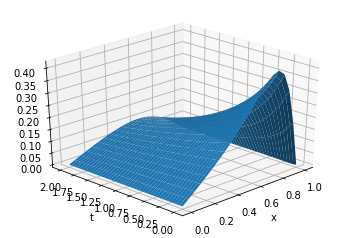

In [159]:
def burgers(xl, xr, tb, te, M, N):
    alpha = 5
    beta = 4
    D = 0.05
    f = lambda x : 2 * D * beta * np.pi * np.sin(x * np.pi) / (alpha + beta * np.cos(np.pi * x))
    l = lambda t : 0 * t
    r = lambda t : 0 * t
    
    h, k = (xr - xl) / M, (te - tb) / N
    m, n = M + 1, N
    sigma = D * k / (h * h)
    
    w = np.zeros((M + 1) * (n + 1)).reshape(M + 1, n + 1)
    w[:, 0] = f(xl + np.arange(M + 1) * h)
    w1 = np.copy(w[:, 0])
    
    for j in range(0, n):
        for it in range(3):
            DF1 = np.diag(1 + 2 * sigma * np.ones(m)) + np.diag(-sigma * np.ones(m-1), 1) \
                + np.diag(-sigma * np.ones(m-1), -1)
            DF2 = np.diag([0,*(k * w1[2:m] / (2 * h)),0]) - np.diag([0,*(k * w1[0:m - 2] / (2 * h)),0]) \
                + np.diag([0,*(k * w1[1:m - 1] / (2 * h))], 1) - np.diag([*(k * w1[1:m - 1] / (2 * h)), 0], -1) 
            DF = DF1 + DF2;
            F = -w[:,j] + np.matmul((DF1 + DF2 / 2), w1)
            DF[0,:] = np.array([1, *np.zeros(m-1)])
            F[0] = w1[0] - l(j)
            F[m-1] = w1[m-1] - r(j)
            w1 -= np.matmul(np.linalg.inv(DF), F)
        w[:, j + 1] = w1
        
    # 3-D Plot
    x = xl + np.arange(M + 1) * h
    t = tb + np.arange(n + 1) * k
    X, T = np.meshgrid(x, t)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(azim=225)
    ax.plot_surface(X, T, w.T)
    plt.xlabel('x')
    plt.ylabel('t')
    plt.show()
    plt.close()
    
    
burgers(0, 1, 0, 2, 20, 40)